ValueError: ignored

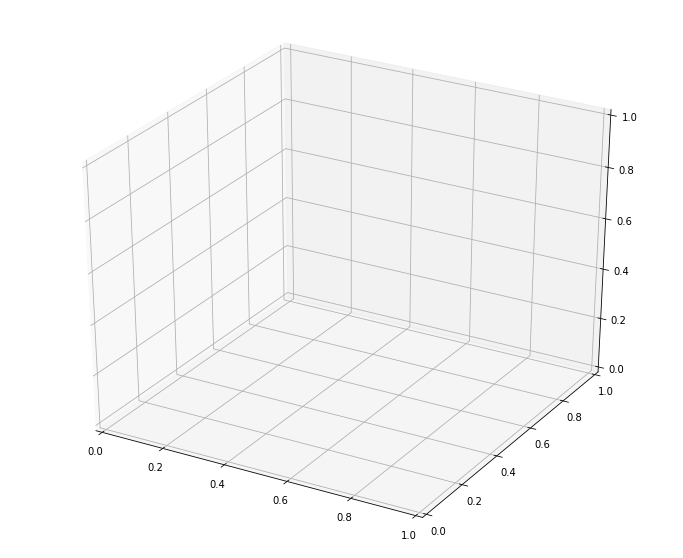

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = np.arange(-5, 5.1, 0.2)
y = np.arange(-5, 5.1, 0.2)

X, Y = np.meshgrid(x, y)
Z = np.sin(X)*np.cos(Y)
pos = np.dstack((x, y))
rv = multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
surf = ax.plot_surface(X, Y, rv.pdf(pos), cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

#fig.colorbar(surf, shrink=0.5, aspect=8)


fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
#ax2.contourf(x, y, rv.pdf(pos))
#surf2 = ax.plot_surface(X, Y, 0*Z, cmap = plt.cm.cividis)
#fig.colorbar(surf2, shrink=0.5, aspect=8)

plt.show()

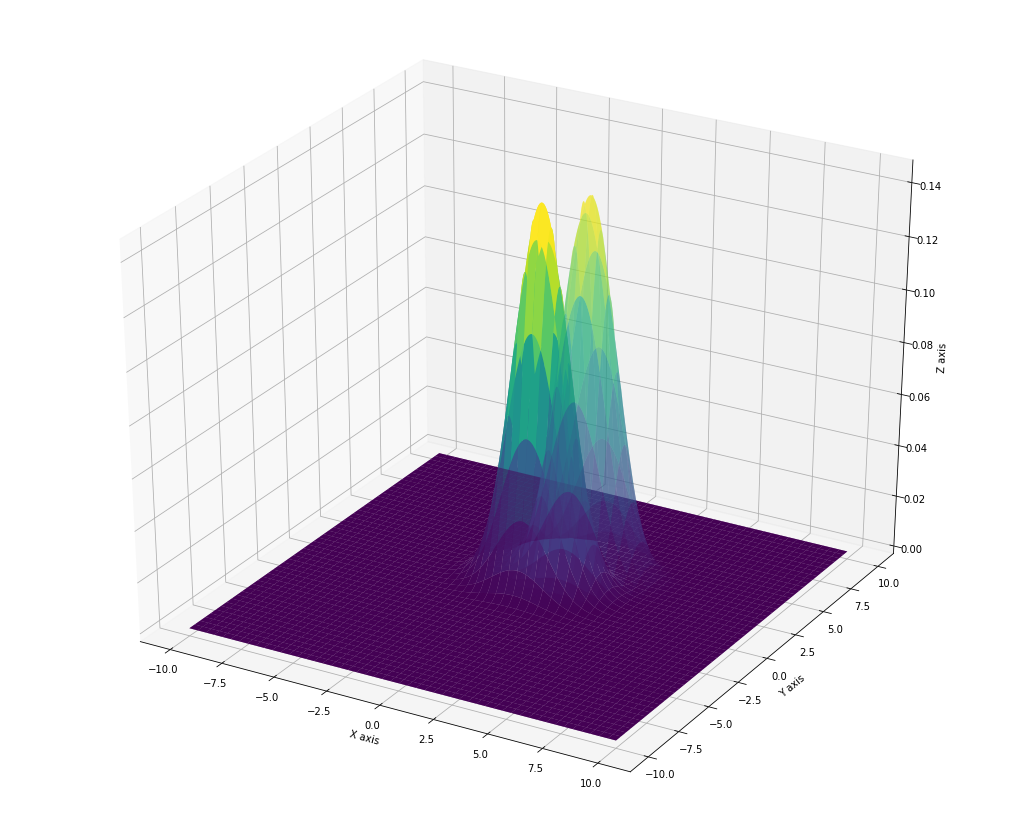

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

#Parameters to set
m1_x = 0.4
m2_x = 1.5
variance_x = 1.5

m1_y = 0.8
m2_y = 2.7
variance_y = 0.8

#Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv1 = multivariate_normal([m1_x, m1_y], [[variance_x, 0], [0, variance_y]])
rv2 = multivariate_normal([m2_x, m2_y], [[variance_x, 0], [0, variance_y]])

#Make a 3D plot
fig = plt.figure(figsize = (18,15))
#plt.figure(facecolor = "gray")
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv1.pdf(pos),cmap='viridis',linewidth=0)
ax.plot_surface(X, Y, rv2.pdf(pos),cmap='viridis',linewidth=0,alpha=0.5)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

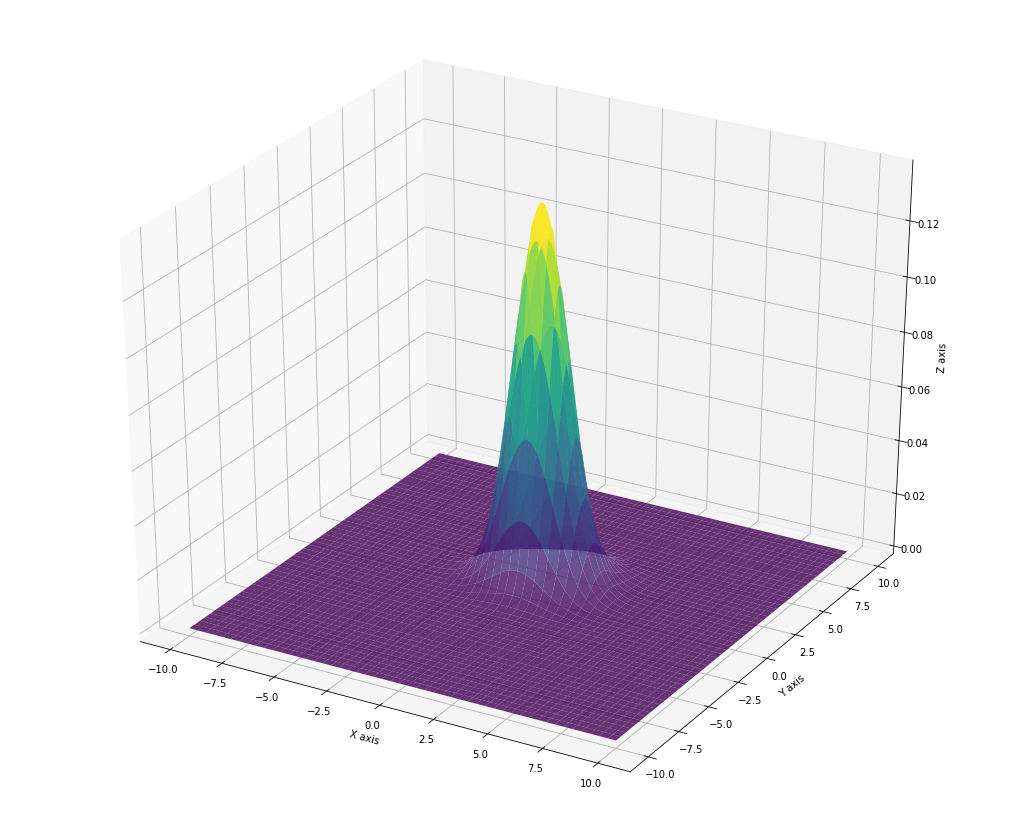

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

#Parameters to set
m1_x = 0.4
m2_x = 1.5
variance_x = 1.5

m1_y = 0.8
m2_y = 2.7
variance_y = 0.8

P_omega1 = 0.95
P_omega2 = 0.05

#Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv1 = multivariate_normal([m1_x, m1_y], [[variance_x, 0], [0, variance_y]])
rv2 = multivariate_normal([m2_x, m2_y], [[variance_x, 0], [0, variance_y]])

#Make a 3D plot
fig = plt.figure(figsize = (18,15))
#plt.figure(facecolor = "gray")
ax = fig.gca(projection='3d')
totalProbability = rv1.pdf(pos) * P_omega1 + rv2.pdf(pos) * P_omega2
ax.plot_surface(X, Y, totalProbability,cmap='viridis',linewidth=0,alpha=0.8)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

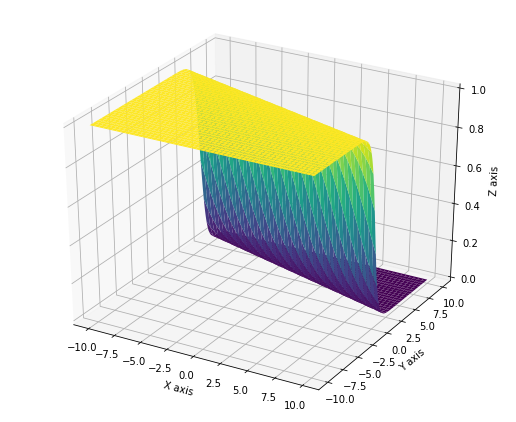

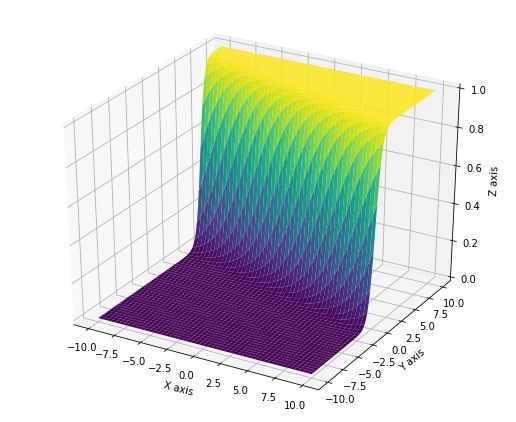

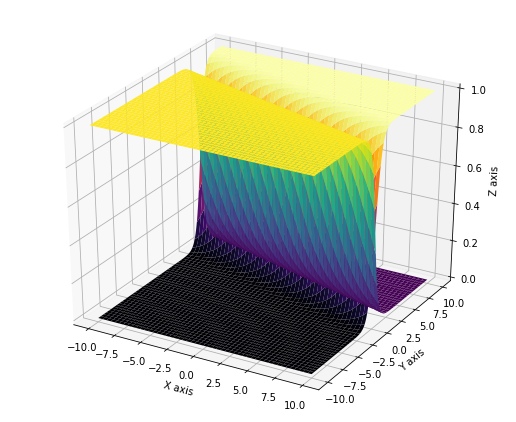

In [16]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

#Parameters to set
m1_x = 0.4
m2_x = 1.5
variance_x = 1.5

m1_y = 0.8
m2_y = 2.7
variance_y = 0.8

P_omega1 = 0.95
P_omega2 = 0.05

#Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
Px_omega1 = multivariate_normal([m1_x, m1_y], [[variance_x, 0], [0, variance_y]])
Px_omega2 = multivariate_normal([m2_x, m2_y], [[variance_x, 0], [0, variance_y]])
totalProbability = Px_omega1.pdf(pos) * P_omega1 + Px_omega2.pdf(pos) * P_omega2

Pomega1_x = (Px_omega1.pdf(pos) * P_omega1) / totalProbability
Pomega2_x = (Px_omega2.pdf(pos) * P_omega2) / totalProbability

#Make a 3D plot
fig1 = plt.figure(figsize = (9,7.5))
fig2 = plt.figure(figsize = (9,7.5))
fig3 = plt.figure(figsize = (9,7.5))
#plt.figure(facecolor = "gray")
ax1 = fig1.gca(projection='3d')
ax1.plot_surface(X, Y, Pomega1_x,cmap='viridis',linewidth=0)
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')

ax2 = fig2.gca(projection='3d')
ax2.plot_surface(X, Y, Pomega2_x,cmap='viridis',linewidth=0)
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')

ax3 = fig3.gca(projection='3d')
ax3.plot_surface(X, Y, Pomega1_x,cmap='viridis',linewidth=0)
ax3.plot_surface(X, Y, Pomega2_x,cmap='inferno',linewidth=0)
ax3.set_xlabel('X axis')
ax3.set_ylabel('Y axis')
ax3.set_zlabel('Z axis')

plt.show()

In [119]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

#Parameters to set
m1_x = 0.4
m2_x = 1.5
variance_x = 1.5

m1_y = 0.8
m2_y = 2.7
variance_y = 0.8

P_omega1 = 0.95
P_omega2 = 0.05

#Create grid and multivariate normal
x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
Px_omega1 = multivariate_normal([m1_x, m1_y], [[variance_x, 0], [0, variance_y]])
Px_omega2 = multivariate_normal([m2_x, m2_y], [[variance_x, 0], [0, variance_y]])
totalProbability = Px_omega1.pdf(pos) * P_omega1 + Px_omega2.pdf(pos) * P_omega2

Pomega1_x = (Px_omega1.pdf(pos) * P_omega1) / totalProbability
Pomega2_x = (Px_omega2.pdf(pos) * P_omega2) / totalProbability

sum = 0

for i in range(0,1000):
  for j in range(0,1000):
    if Pomega1_x[i][j] > Pomega2_x[i][j]:
      sum = sum + Px_omega2.pdf(pos[i,j,:]) * P_omega2 *0.0004
    if Pomega2_x[i][j] >= Pomega1_x[i][j]:
      sum = sum + Px_omega1.pdf(pos[i,j,:]) * P_omega1 * 0.0004

print(sum)
len(x)

0.03456325895186966


1000